# Исследование: Прогноз сердечных заболеваний

## Содержание: основной причиной смерти в развитых странах являются болезни сердца. Поэтому необходимо проделать работу, чтобы помочь предотвратить риск сердечного приступа или инсульта.

## Постановка задачи: использовать имеющийся набор данных, чтобы предсказать, какие пациенты с наибольшей вероятностью будут страдать от сердечно-сосудистых заболеваний в ближайшем будущем.

#### Материал взят из репозитория машинного обучения Калифорнийского университета в Ирвине по адресу https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

## Шаг 1. Откроем файл с данными и прочитаем его

In [1]:
#Импорт библиотек и различных метрик для работы 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/Admin/Desktop/masterskaya/Heart_Disease_Prediction.csv') 

In [3]:
data.info()
display (data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


В данном датасете 13 признаков, целевой признак (Heart Disease), 269 строк.

### Описание данных

Age: The person’s age in years

Sex: The person’s sex (1 = male, 0 = female)

Chest pain type: chest pain type:
                 Value 1: asymptomatic
                 Value 2: atypical angina
                 Value 3: non-anginal pain
                 Value 4: typical angina

BP: The person’s resting blood pressure (mm Hg on admission to the hospital)

Cholesterol: The person’s cholesterol measurement in mg/dl

FBS over 120: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

EKG results: resting electrocardiographic results — 
             Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
             Value 1: normal 
             Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Max HR: The person’s maximum heart rate achieved

Exercise angina: Exercise induced angina (1 = yes; 0 = no)

ST depression: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

Slope of ST: the slope of the peak exercise ST segment 
             0: downsloping; 
             1: flat; 
             2: upsloping

Number of vessels fluro: The number of major vessels (0–3)





Thallium: A blood disorder called thalassemia 
          Value 0: NULL (dropped from the dataset previously 
          Value 1: fixed defect (no blood flow in some part of the heart) 
          Value 2: normal blood flow 
          Value 3: reversible defect (a blood flow is observed but it is not normal)	

target: Heart Disease ((1 = yes(Presence), 0 = no(Absence)))



Вывод: В данных оставим все столбцы, т.к. одни или другие проблемы со здоровьем могут стать причиной сердечно-сосудистых заболеваний

# Шаг 2. Предобработка и исследовательский анализ данных

In [4]:
#Изменим на змеиный шрифт названия столбцов и приведем к единообразию
data = data.rename(columns = {'Heart Disease': 'heart_disease', 'Age': 'age', 'Sex': 'sex', 
                              'Chest pain type': 'chest_pain_type', 'BP': 'bp', 'Cholesterol': 'cholesterol', 
                              'FBS over 120': 'fbs_over_120', 'EKG results': 'ekg_results', 'Max HR': 'max_hr', 
                              'Exercise angina': 'exercise_angina', 'ST depression': 'st_depression', 
                              'Slope of ST': 'slope_of_st','Number of vessels fluro': 'number_of_vessels_fluro', 
                              'Thallium': 'thallium', 'Heart Disease': 'heart_disease' })
#Проверим 
display(data)
data.shape

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


(270, 14)

##### Изучим данные на предмет наличия ошибок и аномалий

In [5]:
# Проверим уникальные значения 

print(data['age'].sort_values().unique())
print(" ")
print(data['sex'].sort_values().unique())
print(" ")
print(data['chest_pain_type'].sort_values().unique())
print(" ")
print(data['bp'].sort_values().unique())
print(" ")
print(data['cholesterol'].sort_values().unique())
print(" ")
print(data['fbs_over_120'].sort_values().unique())
print(" ")
print(data['ekg_results'].sort_values().unique())
print(" ")
print(data['max_hr'].sort_values().unique())
print(" ")
print(data['exercise_angina'].sort_values().unique())
print(" ")
print(data['st_depression'].sort_values().unique())
print(" ")
print(data['slope_of_st'].sort_values().unique())
print(" ")
print(data['number_of_vessels_fluro'].sort_values().unique())
print(" ")
print(data['thallium'].sort_values().unique())
print(" ")
print(data['heart_disease'].sort_values().unique())

[29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]
 
[0 1]
 
[1 2 3 4]
 
[ 94 100 101 102 104 105 106 108 110 112 115 117 118 120 122 123 124 125
 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152 155
 156 158 160 165 170 172 174 178 180 192 200]
 
[126 141 149 160 164 166 167 168 172 174 175 177 178 180 182 183 184 185
 186 188 192 193 195 196 197 198 199 200 201 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 239 240 242 243 244 245 246 247
 248 249 250 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 273 274 275 276 277 281 282 283 284 286 288 289 290
 293 294 295 298 299 300 302 303 304 305 306 307 308 309 311 313 315 318
 319 321 322 325 326 327 330 335 340 341 353 354 360 394 407 409 417 564]
 
[0 1]
 
[0 1 2]
 
[ 71  88  95  96  97  99 103 105 106 108 109 111 112 

In [6]:
# Проверяем наличие пропусков
data.isna().sum()

age                        0
sex                        0
chest_pain_type            0
bp                         0
cholesterol                0
fbs_over_120               0
ekg_results                0
max_hr                     0
exercise_angina            0
st_depression              0
slope_of_st                0
number_of_vessels_fluro    0
thallium                   0
heart_disease              0
dtype: int64

In [7]:
# Поиск дубликатов
data.duplicated().sum()

0

In [8]:
data.describe()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


Вывод: данные чистые, предварительной обработки не потребовалось. Удалять столбцы не будем, т.к. это медицинские понятия и наличие одного или другого показателя может влиять на болезнь человека Целевой признак будет формироваться из колонки наличие болезни "heart_disease", т.к. в задании просят предсказать, какие пациенты с наибольшей вероятностью будут страдать от сердечно-сосудистых заболеваний.

##### Для изучения взаимозависимости данных составим матрицу корелляции некатегоризированных значений

In [9]:
ds = data[['age', 'bp', 'cholesterol', 'max_hr']]
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          270 non-null    int64
 1   bp           270 non-null    int64
 2   cholesterol  270 non-null    int64
 3   max_hr       270 non-null    int64
dtypes: int64(4)
memory usage: 8.6 KB


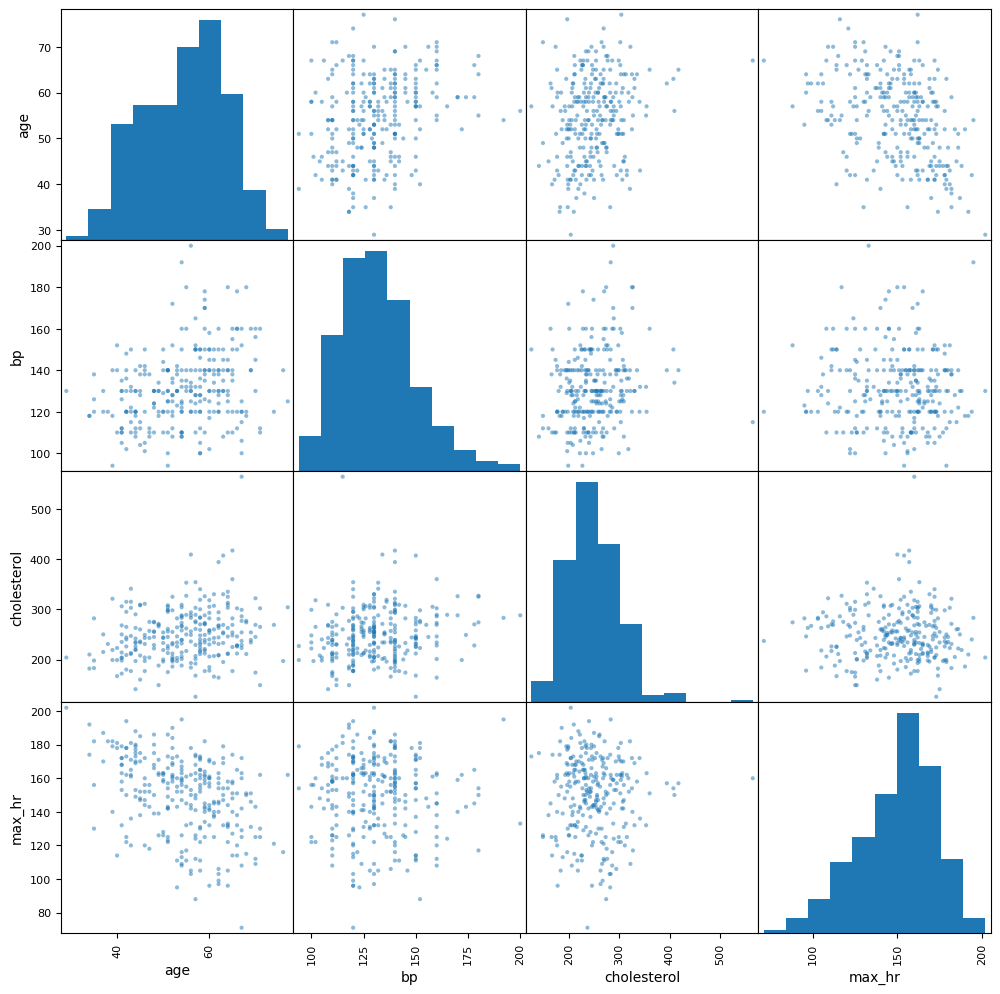

In [10]:
ax = pd.plotting.scatter_matrix(ds,figsize=(12, 12))

Вывод: прослеживается связь между признакими такими как возраст и холестирол, холестерол и учащенное сердцебиение

### Выделение признаков, целевого признака, деление данных на выборки

Целевой признак "heart_disease_Presence" представлен категориальными значениями. Для построения модели машинного обучения необходимо их перевести в численные. Для этого применим кодирование методом one hot encoding. 

К прямому кодированию применим метод get_dummies() с аргументом drop_first=True, избежав "ловушку фиктивных признаков"

In [11]:
data_ohe=pd.get_dummies(data, drop_first=True)
data_ohe.head()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


Выделяем признаки и целевой признак

In [12]:
features=data_ohe.drop(['heart_disease_Presence'],axis=1) # Признаки
target=data_ohe['heart_disease_Presence'] # Целевой признак

#### Данные разобьем на три части: обучающую, валидационную и тестовую. Исходные данные разбиваем в соотношении 3:1:1.

In [13]:
train_features, test_features, train_target, test_target = train_test_split(features, target, 
                                                    train_size=0.6, 
                                                    random_state=12345,
                                                    stratify=target,shuffle=True)
print('train_features',train_features.shape)

train_features (162, 13)


In [14]:
test_features, valid_features, test_target, valid_target = train_test_split(test_features, test_target, 
                                                    train_size=0.5, 
                                                    random_state=12345,
                                                    stratify= test_target, shuffle=True)

Проверяем размеры выборок

In [15]:
print('Размеры выборок:')
print('train_features',train_features.shape)
print('valid_features', valid_features.shape)
print('test_features', test_features.shape)
print('train_target', train_target.shape)
print('valid_target', valid_target.shape)
print('test_target', test_target.shape)

Размеры выборок:
train_features (162, 13)
valid_features (54, 13)
test_features (54, 13)
train_target (162,)
valid_target (54,)
test_target (54,)


#####   Проверим соотношение классов

In [16]:
print('соотношение классов в исходном датасете:', round((target[target == 0].count()/target[target == 1].count()),2))
print('соотношение классов на учебной выборке:', round((train_target[train_target == 0
                                                             ].count()/train_target[train_target == 1].count()),2))
print('соотношение классов на валидационной выборке:', round((valid_target[valid_target == 0
                                                                   ].count()/valid_target[valid_target == 1].count()),2))
print('соотношение классов на тестовой выборке:', round((test_target[test_target == 0].count()/
                                                         test_target[test_target == 1].count()),2))

соотношение классов в исходном датасете: 1.25
соотношение классов на учебной выборке: 1.25
соотношение классов на валидационной выборке: 1.25
соотношение классов на тестовой выборке: 1.25


Соотношение классов на всех выбоках одинаково

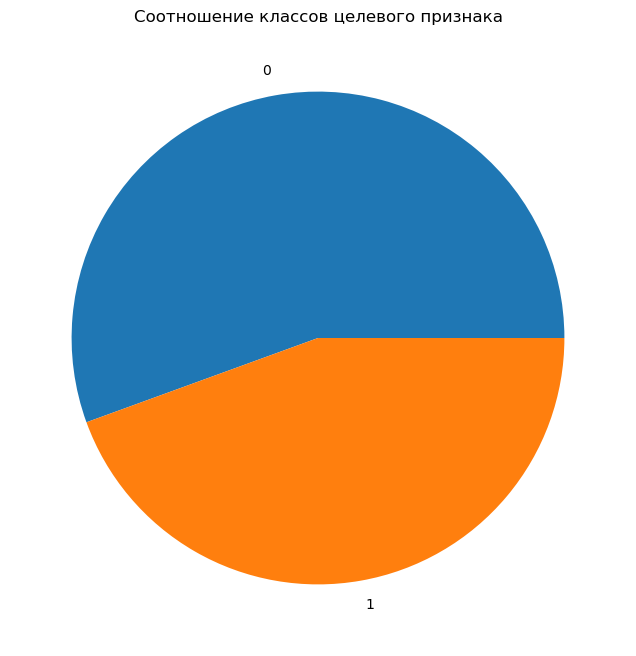

In [17]:
a = data_ohe.groupby('heart_disease_Presence').size()
a.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Соотношение классов целевого признака")
plt.ylabel("")
plt.show()

#### Построим baseline модель 

In [18]:
STATE = RandomState(12345)

In [19]:
# Строим модель DecisionTree при дисбалансе классов и гиперпараметрах по умолчанию 
model_tree = DecisionTreeClassifier(random_state=STATE)
model_tree.fit(train_features,train_target)
tree_prediction = model_tree.predict(valid_features)
print("accuracy:", round ((model_tree.score(valid_features,valid_target)),2))
print("precision:", round((precision_score(valid_target, tree_prediction)),2))
print("recall:", round((recall_score(valid_target, tree_prediction)),2))
print("F1:", round ((f1_score(valid_target,tree_prediction)),2))
print("AUC ROC:", round(roc_auc_score(valid_target, (model_tree.predict_proba(valid_features))[:, 1]),2))
print("confusion_matrix:")
print(confusion_matrix(valid_target, tree_prediction))

a = ['DT', round ((model_tree.score(valid_features,valid_target)),2)
     ,round ((f1_score(valid_target,tree_prediction)),2)
     ,round(roc_auc_score(valid_target, (model_tree.predict_proba(valid_features))[:, 1]),2)]
a

accuracy: 0.7
precision: 0.63
recall: 0.79
F1: 0.7
AUC ROC: 0.71
confusion_matrix:
[[19 11]
 [ 5 19]]


['DT', 0.7, 0.7, 0.71]

In [20]:
# Строим модель  Random forest при дисбалансе классов и гиперпараметрах по умолчанию 
model_forest = RandomForestClassifier(random_state=STATE)
model_forest.fit(train_features,train_target)        
forest_prediction = model_forest.predict(valid_features)
print("accuracy:", round ((model_forest.score(valid_features,valid_target)),2))
print("precision:", round((precision_score(valid_target, forest_prediction)),2))
print("recall:", round((recall_score(valid_target, forest_prediction)),2))
print("F1:", round ((f1_score(valid_target, forest_prediction)),2))
print("AUC ROC:", round(roc_auc_score(valid_target, (model_forest.predict_proba(valid_features))[:, 1]),2))
print("confusion_matrix:")
print(confusion_matrix(valid_target, forest_prediction))

b = ['RF', round ((model_forest.score(valid_features,valid_target)),2)
     ,round ((f1_score(valid_target, forest_prediction)),2)
     ,round(roc_auc_score(valid_target, (model_forest.predict_proba(valid_features))[:, 1]),2)]
b

accuracy: 0.85
precision: 0.86
recall: 0.79
F1: 0.83
AUC ROC: 0.94
confusion_matrix:
[[27  3]
 [ 5 19]]


['RF', 0.85, 0.83, 0.94]

In [21]:
# Построим логистическую регрессию до каких-либо улучшений моделей
model_logistic=LogisticRegression(random_state=STATE).fit(train_features,train_target)
prediction_logistic=model_logistic.predict(valid_features)
print("accuracy:", round ((model_logistic.score(valid_features,valid_target)),2))
print("precision:", round((precision_score(valid_target, prediction_logistic)),2))
print("recall:", round((recall_score(valid_target, prediction_logistic)),2))
print("F1:", round ((f1_score(valid_target, prediction_logistic)),2))
print("AUC ROC:", round(roc_auc_score(valid_target, (model_logistic.predict_proba(valid_features))[:, 1]),2))
print("confusion_matrix:")
print(confusion_matrix(valid_target, prediction_logistic))

c = ['LR', round ((model_logistic.score(valid_features,valid_target)),2)
     ,round ((f1_score(valid_target, prediction_logistic)),2)
     ,round(roc_auc_score(valid_target, (model_logistic.predict_proba(valid_features))[:, 1]),2)]
c

accuracy: 0.91
precision: 0.95
recall: 0.83
F1: 0.89
AUC ROC: 0.94
confusion_matrix:
[[29  1]
 [ 4 20]]


['LR', 0.91, 0.89, 0.94]

### График ROC

#### Модель DecisionTree

In [35]:
probabilities_tree=model_tree.predict_proba(valid_features)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(valid_target,probabilities_one_valid_tree)
auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)
round ((auc_roc_tree), 2)

0.71

#### Модель Random forest

In [34]:
probabilities_forest=model_forest.predict_proba(valid_features)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(valid_target,probabilities_one_valid_forest)
auc_roc_forest=roc_auc_score(valid_target,probabilities_one_valid_forest)
round ((auc_roc_forest), 2)

0.94

#### Модель Logistic Regression

In [33]:
probabilities_reg=model_logistic.predict_proba(valid_features)
probabilities_one_valid_reg=probabilities_reg[:,1]
fpr_log,tpr_log,thresholds=roc_curve(valid_target,probabilities_one_valid_reg)
auc_roc_reg=roc_auc_score(valid_target,probabilities_one_valid_reg)
round ((auc_roc_reg),2)

0.94

<Figure size 640x480 with 0 Axes>

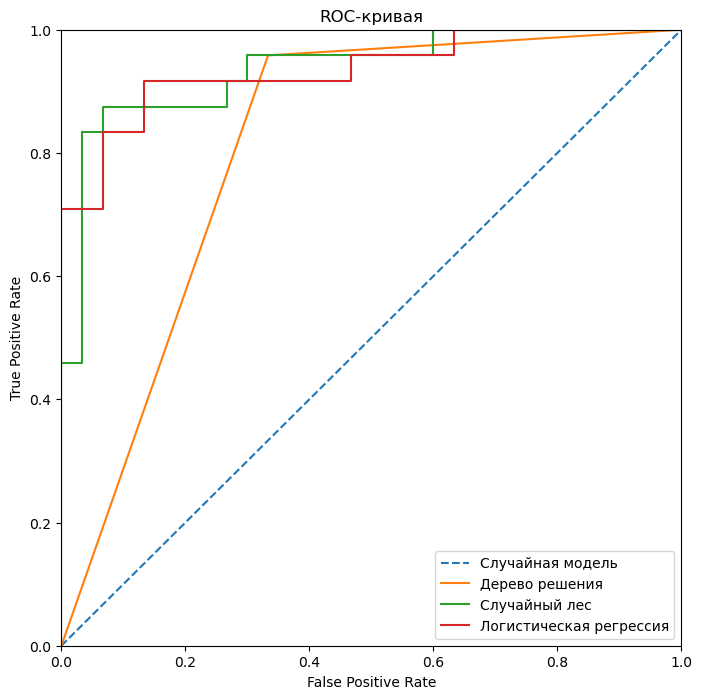

In [71]:
plt.figure()

plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.plot(fpr_log,tpr_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Дерево решения','Случайный лес','Логистическая регрессия'),
           loc= 'lower right') 
plt.show()

,AUC ROC,Accuracy,F1-мера
bs_model,,,
DT,0.71,0.70,0.70
LR,0.94,0.91,0.89
RF,0.94,0.85,0.83


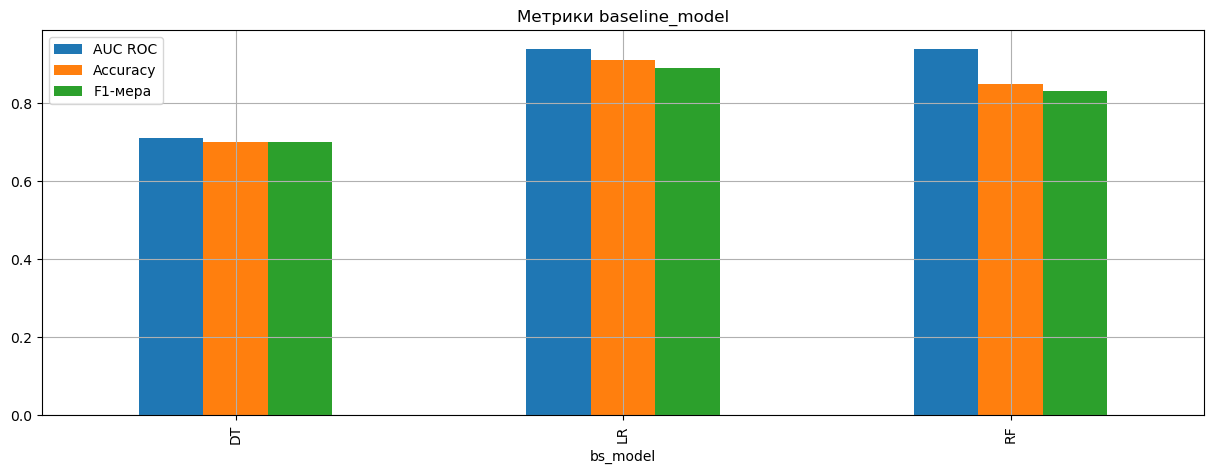

In [38]:
d = pd.DataFrame(data = [a, b, c],columns = ['bs_model', 'Accuracy','F1-мера', 'AUC ROC'])
d = d.pivot_table(index='bs_model', values=['Accuracy','F1-мера', 'AUC ROC'])
display(d)
ax = d.plot(grid=True, kind='bar', title='Метрики baseline_model', figsize=(15, 5))

Общий вывод:
Рассматривая данные с дисбалансом (но, с переведенными категориальными в численные данные) тремя моделями можно сделать вывод, что саммая лучшая модель оказалась логистическая регрессия при F1=0,94.

## Обучение моделей

### Подготовка данных для обучения моделей

Для оптимизации процесса обучения во всех трех выборках категоризируем признак 'bp', поскольку изменение давления в пределах 10 пунктов считается погрешностью. Для этого напишем функцию, предварительно изменив тип данных на int.  

In [39]:
# Изменяем тип данных
print(train_features['bp'].sort_values().unique())
train_features['bp'] = train_features['bp'].astype('int')
valid_features['bp'] = valid_features['bp'].astype('int')
test_features['bp'] = test_features['bp'].astype('int')
train_features.info()

[ 94 101 102 105 106 108 110 112 115 117 118 120 122 124 125 126 128 130
 132 134 135 136 138 140 142 144 145 146 148 150 155 156 158 160 165 170
 172 178 180 192 200]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 94 to 125
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      162 non-null    int64  
 1   sex                      162 non-null    int64  
 2   chest_pain_type          162 non-null    int64  
 3   bp                       162 non-null    int32  
 4   cholesterol              162 non-null    int64  
 5   fbs_over_120             162 non-null    int64  
 6   ekg_results              162 non-null    int64  
 7   max_hr                   162 non-null    int64  
 8   exercise_angina          162 non-null    int64  
 9   st_depression            162 non-null    float64
 10  slope_of_st              162 non-null    int64  
 11  number_of_vessels_f

In [40]:
valid_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 232 to 14
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      54 non-null     int64  
 1   sex                      54 non-null     int64  
 2   chest_pain_type          54 non-null     int64  
 3   bp                       54 non-null     int32  
 4   cholesterol              54 non-null     int64  
 5   fbs_over_120             54 non-null     int64  
 6   ekg_results              54 non-null     int64  
 7   max_hr                   54 non-null     int64  
 8   exercise_angina          54 non-null     int64  
 9   st_depression            54 non-null     float64
 10  slope_of_st              54 non-null     int64  
 11  number_of_vessels_fluro  54 non-null     int64  
 12  thallium                 54 non-null     int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 5.7 KB


In [41]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 209 to 213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      54 non-null     int64  
 1   sex                      54 non-null     int64  
 2   chest_pain_type          54 non-null     int64  
 3   bp                       54 non-null     int32  
 4   cholesterol              54 non-null     int64  
 5   fbs_over_120             54 non-null     int64  
 6   ekg_results              54 non-null     int64  
 7   max_hr                   54 non-null     int64  
 8   exercise_angina          54 non-null     int64  
 9   st_depression            54 non-null     float64
 10  slope_of_st              54 non-null     int64  
 11  number_of_vessels_fluro  54 non-null     int64  
 12  thallium                 54 non-null     int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 5.7 KB


In [ ]:
# Пишем функцию
def bp(row):
    if row <= 100:
        return '1'
    if 100 < row <= 110: 
        return '2'
    if 110 < row <= 120:
        return '3'
    if 120 < row <= 130:
        return '4'
    if 130 < row <= 140: 
        return '5'
    if 140 < row <= 150:
        return '6'
    if 150 < row <= 160:
        return '7'
    if 160 < row <= 170: 
        return '8'
    if 170 < row <= 180:
        return '9'
    else:
        return '10'
    
train_features['bp'] = train_features['bp'].apply(bp)
valid_features['bp'] = valid_features['bp'].apply(bp)
test_features['bp'] = test_features['bp'].apply(bp)
print(train_features['bp'].value_counts())
print(valid_features['bp'].value_counts())
print(test_features['bp'].value_counts())

#### Стандартизируем выборки, т.к есть значения и маленькие и очень большие. 

In [42]:
numeric=['age','cholesterol','max_hr']
scaler=StandardScaler()
scaler.fit(train_features[numeric])
train_features[numeric] = scaler.transform(train_features[numeric])
scaler.fit(valid_features[numeric])
valid_features[numeric] = scaler.transform(valid_features[numeric])
scaler.fit(test_features[numeric])
test_features[numeric] = scaler.transform(test_features[numeric])
display(train_features.head(5))
display(valid_features.head(5))
display(test_features.head(5))

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium
94,-0.277557,1,4,125,-0.630817,0,0,0.857684,0,1.0,1,2,7
72,1.672702,1,2,156,-0.019109,0,2,-0.239133,0,0.0,1,0,3
189,1.672702,1,3,160,0.425770,0,0,-1.599186,1,2.9,2,1,7
47,-1.144339,1,4,110,-0.908866,0,2,1.252538,0,0.0,1,1,3
1,1.347658,0,3,115,5.894067,0,2,0.506702,0,1.6,2,0,7


,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium
232,-0.951149,1,4,115,0.179209,0,2,1.305306,0,0.0,1,0,3
269,1.688956,1,4,160,0.694801,0,2,-1.938844,1,1.5,2,3,3
188,1.088932,0,4,140,2.836493,0,2,0.125615,0,1.2,2,0,3
119,0.368903,1,4,130,0.635310,1,2,-2.149503,1,1.6,3,0,7
137,0.368903,1,4,125,-0.038927,1,2,-0.422098,1,1.2,2,1,3


,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium
209,-2.015415,1,3,130,-0.211941,0,0,1.653599,0,3.5,3,0,3
163,0.265504,1,4,128,-0.005522,0,2,-0.828009,1,3.0,2,2,7
240,1.351656,1,3,180,0.338512,1,2,0.042731,1,1.6,2,0,7
145,-0.277572,1,4,123,0.521996,0,0,-2.351804,1,2.0,2,2,7
151,-0.603418,0,3,120,-0.922944,0,0,0.391027,0,1.6,2,0,3


### Модели после обработки данных с применением методов устранения дисбаланса

#### Построение моделей при выравнивании классов аргументом class_weight 

#### Модель DecisionTree

In [43]:
# Подбор лучших гиперпараметров для DecisionTree
parametrs = {'min_samples_leaf': range (1,11,2),
             'max_depth': range (1,10),
            'class_weight' : ['balanced']}
tree_model = GridSearchCV(DecisionTreeClassifier(random_state=STATE), parametrs, scoring='f1', cv=5)
tree_model.fit(train_features,train_target)
print("Лучшие гиперпараметры для модели 'Решающее дерево':", tree_model.best_params_)

Лучшие гиперпараметры для модели 'Решающее дерево': {'class_weight': 'balanced', 'max_depth': 3, 'min_samples_leaf': 7}


In [44]:
# Строим модель, выводим метрики качества

tree_model = DecisionTreeClassifier(random_state=12345, max_depth = 3, min_samples_leaf = 7, class_weight='balanced') 
tree_model.fit(train_features,train_target)        
tree_model_prediction = tree_model.predict(valid_features)

print("accuracy:", round ((tree_model.score(valid_features,valid_target)),2))
print("precision:", round((precision_score(valid_target, tree_model_prediction)),2))
print("recall:", round((recall_score(valid_target,tree_model_prediction)),2))
print("F1:", round ((f1_score(valid_target, tree_model_prediction)),2))
print("AUC ROC:", round(roc_auc_score(valid_target, (tree_model.predict_proba(valid_features))[:, 1]),2))
print("confusion_matrix:")
print(confusion_matrix(valid_target, tree_model_prediction))

s = ['DT', round ((tree_model.score(valid_features,valid_target)),2)
     ,round ((f1_score(valid_target,tree_model_prediction)),2)
     ,round(roc_auc_score(valid_target, (tree_model.predict_proba(valid_features))[:, 1]),2)]
s

accuracy: 0.83
precision: 0.83
recall: 0.79
F1: 0.81
AUC ROC: 0.91
confusion_matrix:
[[26  4]
 [ 5 19]]


['DT', 0.83, 0.81, 0.91]

#### Модель Logistic Regression

In [45]:
# Подбор лучших гиперпараметров для Logistic Regression
solver =  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
best_s = None
best_f1 = 0
best_i = 0 
for s in solver:        
    for i in range(1000,10000,1000):
            log_model = LogisticRegression(random_state=STATE, max_iter = i,solver = s)
            log_model.fit(train_features,train_target)
            log_predictions = log_model.predict(valid_features)
            result = f1_score(valid_target, log_predictions)
            if result > best_f1:
                best_i = i
                best_f1 = result
                best_s = s              
print("Лучшее значение f1 =", round((best_f1),2),  " при max_iter =", best_i, ",solver:", best_s)    


Лучшее значение f1 = 0.89  при max_iter = 1000 ,solver: newton-cg


In [46]:
# Строим модель, выводим метрики качества
log_model = LogisticRegression(random_state=STATE, max_iter = 1000, solver='newton-cg', penalty = 'l2')
log_model.fit(train_features,train_target)
log_predictions = log_model.predict(valid_features) 

print("accuracy:",round((log_model.score(valid_features,valid_target)),2))
print("precision:", round((precision_score(valid_target, log_predictions)),2))
print("recall:", round((recall_score(valid_target, log_predictions)),2))
print("F1-мера:", round((f1_score(valid_target, log_predictions)),2))
print("AUC ROC:", round(roc_auc_score(valid_target, (log_model.predict_proba(valid_features))[:, 1]),4))
print("confusion_matrix:")
print(confusion_matrix(valid_target,log_predictions))

g = ['LR', round ((log_model.score(valid_features,valid_target)),2)
     ,round ((f1_score(valid_target, log_predictions)),2)
     ,round(roc_auc_score(valid_target, (log_model.predict_proba(valid_features))[:, 1]),2)]
g

accuracy: 0.91
precision: 0.91
recall: 0.88
F1-мера: 0.89
AUC ROC: 0.9556
confusion_matrix:
[[28  2]
 [ 3 21]]


['LR', 0.91, 0.89, 0.96]

#### Модель Random forest

In [47]:
# Подбираем лучшие гиперпараметры для построения модели Random forest 
best_depth = 0
best_f1 = 0
best_msl = 0 
for depth in range(1, 10):
    for msl in range(1, 11,2):
        model_forest = RandomForestClassifier(random_state=STATE, max_depth=depth, 
                                              min_samples_leaf = msl, class_weight='balanced')
        model_forest.fit(train_features,train_target)
        forest_prediction = model_forest.predict(valid_features)
        result = f1_score(valid_target, forest_prediction)
        if result > best_f1:
            best_depth = depth
            best_msl = msl
            best_f1 = result
            
print("Лучшее значение f1 =", round((best_f1),2), "при max_depth =", best_depth, "и min_samples_leaf =", best_msl)   

Лучшее значение f1 = 0.91 при max_depth = 3 и min_samples_leaf = 3


In [48]:
# Строим модель, выводим метрики качества

model_forest = RandomForestClassifier(random_state=STATE, max_depth = 4, min_samples_leaf = 3, class_weight='balanced') 
model_forest.fit(train_features,train_target)        
forest_prediction = model_forest.predict(valid_features)
print("accuracy:", round ((model_forest.score(valid_features,valid_target)),2))
print("precision:", round((precision_score(valid_target, forest_prediction)),2))
print("recall:", round((recall_score(valid_target, forest_prediction)),2))
print("F1:", round ((f1_score(valid_target, forest_prediction)),2))
print("AUC ROC:", round(roc_auc_score(valid_target, (model_forest.predict_proba(valid_features))[:, 1]),4))
print("confusion_matrix:")
print(confusion_matrix(valid_target, forest_prediction))

f = ['RF', round ((model_forest.score(valid_features,valid_target)),2)
     ,round ((f1_score(valid_target, forest_prediction)),2)
     ,round(roc_auc_score(valid_target, (model_forest.predict_proba(valid_features))[:, 1]),2)]
f

accuracy: 0.93
precision: 0.95
recall: 0.88
F1: 0.91
AUC ROC: 0.9403
confusion_matrix:
[[29  1]
 [ 3 21]]


['RF', 0.93, 0.91, 0.94]

Вывод: после стандартизации данных и выравнивании классов аргументом class_weight наилучшей моделью становится RandomForest c F1 = 0.91

In [ ]:
#q = pd.DataFrame(data = [s, g, f],columns = ['weight_model', 'Accuracy','F1-мера', 'AUC ROC'])
#q = q.pivot_table(index='weight_model', values=['Accuracy','F1-мера', 'AUC ROC'])
#display(q)
#ax = q.plot(grid=True, kind='bar', title='Метрики "взвешиания классов"', figsize=(15, 5))

#### Построение моделей при выравнивании классов функцией Downsampling 

Для построения моделей при отсутствии дисбаланса классов пишем функцию Downsampling по уменьшению числа объектов отрицательного класса

In [49]:
# Функция Downsampling
def downsampling (features,target,fraction):
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
          
    downsampling_features=pd.concat([features_null.sample(frac=fraction, random_state=STATE)] + [features_one])
    downsampling_target = pd.concat([target_null.sample(frac=fraction, random_state=STATE)] + [target_one])
    
    downsampling_features,downsampling_target=shuffle(downsampling_features,downsampling_target,random_state=STATE)
    
    return downsampling_features,downsampling_target

features_balance_down,target_balance_down=downsampling(train_features,train_target, 0.8)

print('Размеры выборок после увеличения положительного класса:')
print('features_balance_up', features_balance_down.shape)
print('target_balance_up', target_balance_down.shape)
print('соотношение классов после увеличения выборки:',round(
    (target_balance_down[target_balance_down ==0].count()/target_balance_down[target_balance_down==1].count()),2))

Размеры выборок после увеличения положительного класса:
features_balance_up (144, 13)
target_balance_up (144,)
соотношение классов после увеличения выборки: 1.0


#### Модель DecisionTree

In [50]:
# Подбор лучших гиперпараметров для DecisionTree
parametrs = {'min_samples_leaf': range (1,11,2),
             'max_depth': range (1,10)}
tree_model = GridSearchCV(DecisionTreeClassifier(random_state=STATE), parametrs, scoring='f1', cv=5)
tree_model.fit(features_balance_down,target_balance_down)
print("Лучшие гиперпараметры для модели 'Решающее дерево':", tree_model.best_params_)


Лучшие гиперпараметры для модели 'Решающее дерево': {'max_depth': 3, 'min_samples_leaf': 9}


In [51]:

# Строим модель, выводим метрики качества

tree_model = DecisionTreeClassifier(random_state=STATE, max_depth = 3, min_samples_leaf = 9) 
tree_model.fit(features_balance_down,target_balance_down)        
tree_model_prediction = tree_model.predict(valid_features)

print("accuracy:", round ((tree_model.score(valid_features,valid_target)),2))
print("precision:", round((precision_score(valid_target, tree_model_prediction)),2))
print("recall:", round((recall_score(valid_target,tree_model_prediction)),2))
print("F1:", round ((f1_score(valid_target, tree_model_prediction)),2))
print("AUC ROC:", round(roc_auc_score(valid_target, (tree_model.predict_proba(valid_features))[:, 1]),2))
print("confusion_matrix:")
print(confusion_matrix(valid_target, tree_model_prediction))

k = ['DT', round ((tree_model.score(valid_features,valid_target)),2)
     ,round ((f1_score(valid_target,tree_model_prediction)),2)
     ,round(roc_auc_score(valid_target, (tree_model.predict_proba(valid_features))[:, 1]),2)]
k

accuracy: 0.87
precision: 0.9
recall: 0.79
F1: 0.84
AUC ROC: 0.9
confusion_matrix:
[[28  2]
 [ 5 19]]


['DT', 0.87, 0.84, 0.9]

#### Модель Logistic Regression

In [52]:
# Подбор лучших гиперпараметров для Logistic Regression
solver =  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
best_s = None
best_f1 = 0
best_i = 0 
for s in solver:        
    for i in range(1000,10000,1000):
            log_model = LogisticRegression(random_state=STATE, max_iter = i,solver = s, penalty = 'l2')
            log_model.fit(features_balance_down,target_balance_down)
            log_predictions = log_model.predict(valid_features)
            result = f1_score(valid_target, log_predictions)
            if result > best_f1:
                best_i = i
                best_f1 = result
                best_s = s              
print("Лучшее значение f1 =", round((best_f1),2),  " при max_iter =", best_i, ",solver:", best_s)    


Лучшее значение f1 = 0.88  при max_iter = 1000 ,solver: newton-cg


In [53]:

# Строим модель, выводим метрики качества
log_model = LogisticRegression(random_state=STATE, max_iter = 1000, solver='newton-cg', penalty = 'l2')
log_model.fit(features_balance_down,target_balance_down)
log_predictions = log_model.predict(valid_features) 

print("accuracy:",round((log_model.score(valid_features,valid_target)),2))
print("precision:", round((precision_score(valid_target, log_predictions)),2))
print("recall:", round((recall_score(valid_target, log_predictions)),2))
print("F1-мера:", round((f1_score(valid_target, log_predictions)),2))
print("AUC ROC:", round(roc_auc_score(valid_target, (log_model.predict_proba(valid_features))[:, 1]),4))
print("confusion_matrix:")
print(confusion_matrix(valid_target,log_predictions))

m = ['LR', round ((log_model.score(valid_features,valid_target)),2)
     ,round ((f1_score(valid_target, log_predictions)),2)
     ,round(roc_auc_score(valid_target, (log_model.predict_proba(valid_features))[:, 1]),2)]
m

accuracy: 0.89
precision: 0.88
recall: 0.88
F1-мера: 0.88
AUC ROC: 0.9528
confusion_matrix:
[[27  3]
 [ 3 21]]


['LR', 0.89, 0.88, 0.95]

#### Модель Random forest

In [54]:
# Подбираем лучшие гиперпараметры для Random forest при устранении дисбаланса путем уменьшения числа объектов 
# отрицательного класса  
parametrs = {'min_samples_leaf': range (1,11,2),
             'max_depth': range (1,10)}
model_forest = GridSearchCV(RandomForestClassifier(random_state=STATE), parametrs, scoring='f1', cv=5)
model_forest.fit(features_balance_down,target_balance_down)
print("Лучшие гиперпараметры для модели 'Случайный лес':", model_forest.best_params_)

Лучшие гиперпараметры для модели 'Случайный лес': {'max_depth': 2, 'min_samples_leaf': 1}


In [55]:


model_forest = RandomForestClassifier(random_state=STATE, max_depth = 2, min_samples_leaf = 3)
model_forest.fit(features_balance_down,target_balance_down)        
forest_prediction = model_forest.predict(valid_features)
print("accuracy:", round ((model_forest.score(valid_features,valid_target)),2))
print("precision:", round((precision_score(valid_target, forest_prediction)),2))
print("recall:", round((recall_score(valid_target, forest_prediction)),2))
print("F1:", round ((f1_score(valid_target, forest_prediction)),2))
print("AUC ROC:", round(roc_auc_score(valid_target, (model_forest.predict_proba(valid_features))[:, 1]),4))
print("confusion_matrix:")
print(confusion_matrix(valid_target, forest_prediction))

l = ['RF', round ((model_forest.score(valid_features,valid_target)),2)
     ,round ((f1_score(valid_target, forest_prediction)),2)
     ,round(roc_auc_score(valid_target, (model_forest.predict_proba(valid_features))[:, 1]),2)]

l

accuracy: 0.89
precision: 0.91
recall: 0.83
F1: 0.87
AUC ROC: 0.9361
confusion_matrix:
[[28  2]
 [ 4 20]]


['RF', 0.89, 0.87, 0.94]

### график AUC-ROC

#### Модель DecisionTree

In [63]:
probabilities_tree=model_tree.predict_proba(valid_features)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(valid_target,probabilities_one_valid_tree)
auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)
round ((auc_roc_tree),2)

0.81

####  Модель Random forest

In [65]:
probabilities_forest=model_forest.predict_proba(valid_features)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(valid_target,probabilities_one_valid_forest)
auc_roc_forest=roc_auc_score(valid_target,probabilities_one_valid_forest)
round ((auc_roc_forest), 2)

0.94

#### Модель Logistic Regression

In [61]:
probabilities_reg=model_logistic.predict_proba(valid_features)
probabilities_one_valid_reg=probabilities_reg[:,1]
fpr_log,tpr_log,thresholds=roc_curve(valid_target,probabilities_one_valid_reg)
auc_roc_reg=roc_auc_score(valid_target,probabilities_one_valid_reg)
round ((auc_roc_reg),2)

0.93

<Figure size 640x480 with 0 Axes>

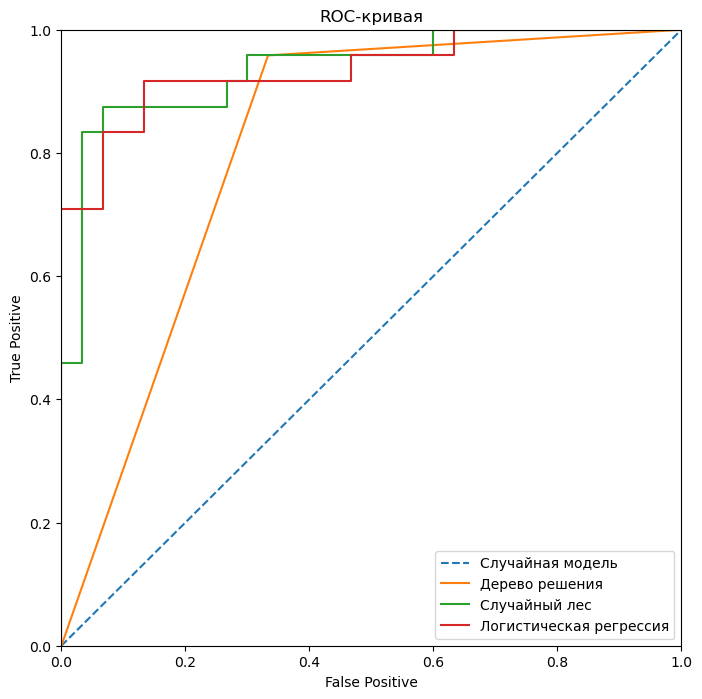

In [70]:
plt.figure()

plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.plot(fpr_log,tpr_log)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Дерево решения', 'Случайный лес','Логистическая регрессия'),
           loc= 'lower right') 
plt.show()

,AUC ROC,Accuracy,F1-мера
Downsampling_model,,,
DT,0.90,0.87,0.84
LR,0.95,0.89,0.88
RF,0.94,0.89,0.87


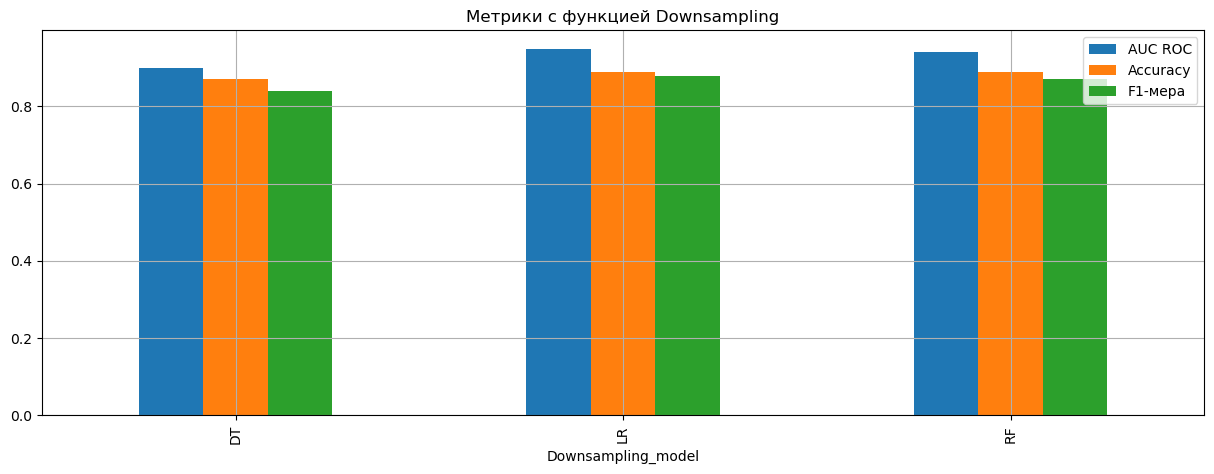

In [56]:
p = pd.DataFrame(data = [k, m, l],columns = ['Downsampling_model', 'Accuracy','F1-мера', 'AUC ROC'])
p = p.pivot_table(index='Downsampling_model', values=['Accuracy','F1-мера', 'AUC ROC'])
display(p)
ax = p.plot(grid=True, kind='bar', title='Метрики с функцией Downsampling', figsize=(15, 5))


После выравнивания классов функцией Downsampling только у решающего дерева поднялась метрика F1 lj 0.84 (c 0.81), при этом наилучшей моделью снова оказалась логистическая регрессия (F1 = 0.88)

## Тестирование

In [ ]:
# Подбор лучших гиперпараметров для Logistic Regression
solver =  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
best_s = None
best_f1 = 0
best_i = 0 
for s in solver:        
    for i in range(1000,10000,1000):
            test_log = LogisticRegression(random_state=STATE, max_iter = i,solver = s, class_weight='balanced', penalty = 'l2')
            test_log.fit(train_features,train_target)
            test_log_predictions = test_log.predict(test_features)
            result = f1_score(test_target, test_log_predictions)
            if result > best_f1:
                best_i = i
                best_f1 = result
                best_s = s              
print("Лучшее значение f1 =", round((best_f1),2),  " при max_iter =", best_i, ",solver:", best_s)   

In [ ]:
# Строим модель, выводим метрики качества
test_log = LogisticRegression(random_state=STATE, max_iter = 1000, solver='liblinear', penalty = 'l2')
test_log.fit(train_features,train_target)
test_log_predictions = test_log.predict(test_features) 

print("accuracy:",round((test_log.score(test_features,test_target)),2))
print("precision:", round((precision_score(test_target, test_log_predictions)),2))
print("recall:", round((recall_score(test_target, test_log_predictions)),2))
print("F1-мера:", round((f1_score(test_target, test_log_predictions)),2))
print("AUC ROC:", round(roc_auc_score(test_target, (test_log.predict_proba(test_features))[:, 1]),4))
print("confusion_matrix:")
print(confusion_matrix(test_target, test_log_predictions))



In [ ]:
parametrs = {'min_samples_leaf': range (1,11,2),
             'max_depth': range (1,10),
            'class_weight' : ['balanced']}
test_forest = GridSearchCV(RandomForestClassifier(random_state=STATE), parametrs, scoring='f1', cv=5)
test_forest.fit(train_features,train_target)
print("Лучшие гиперпараметры для модели 'Случайный лес':", test_forest.best_params_)

In [ ]:
test_forest = RandomForestClassifier(random_state=STATE, max_depth = 3, min_samples_leaf = 9, class_weight='balanced') 
test_forest.fit(train_features,train_target)        
test_forest_prediction = model_forest.predict(test_features)
print("accuracy:", round ((test_forest.score(test_features,test_target)),2))
print("precision:", round((precision_score(test_target, test_forest_prediction)),2))
print("recall:", round((recall_score(test_target, test_forest_prediction)),2))
print("F1:", round ((f1_score(valid_target, forest_prediction)),2))
print("AUC ROC:", round(roc_auc_score(test_target, (test_forest.predict_proba(test_features))[:, 1]),4))
print("confusion_matrix:")
print(confusion_matrix(test_target, test_forest_prediction))